In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('../input/unsw-nb15/UNSW_NB15_training-set.csv')
train.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


<AxesSubplot:>

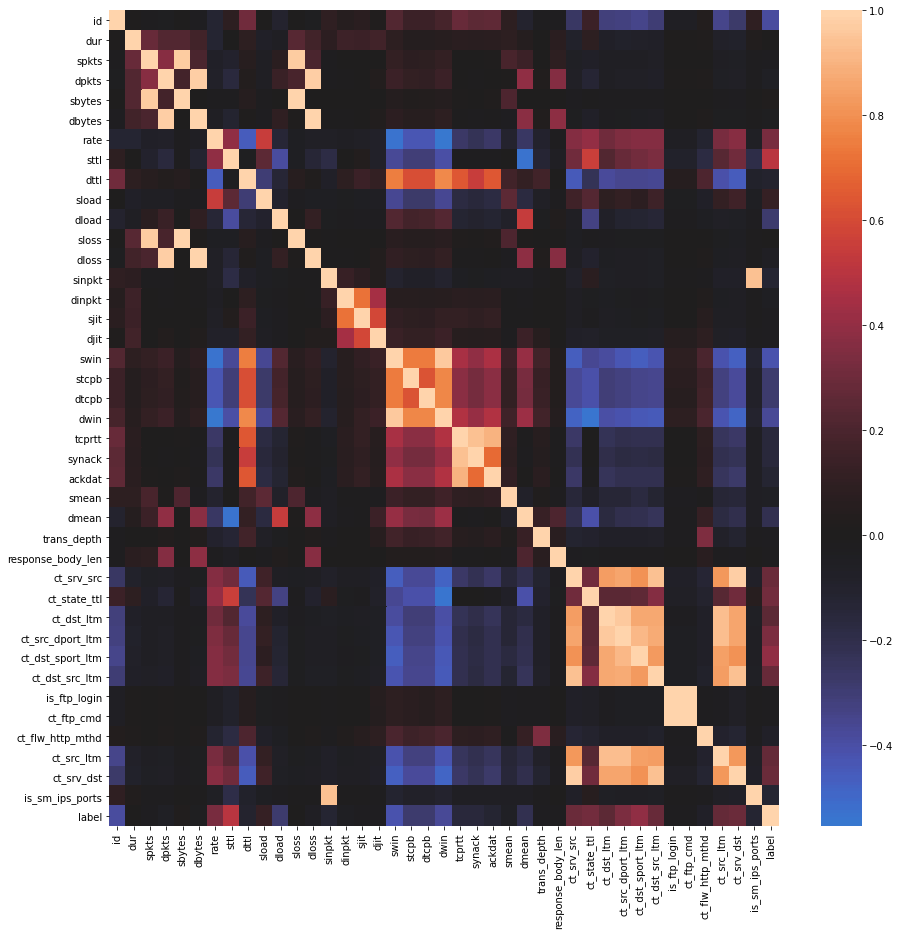

In [2]:
# correlation matrix
corr_mat = train.corr() 
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat, center=0,ax=ax)

In [3]:
columns = corr_mat.columns
print("Percentage correlation is")
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {(corr_mat.iloc[i, j])*100}")


Percentage correlation is
spkts                sbytes               96.57497410287415
spkts                sloss                97.36439932787799
dpkts                dbytes               97.64185516958216
dpkts                dloss                98.15064328008421
sbytes               sloss                99.502719113184
dbytes               dloss                99.71088501020647
sinpkt               is_sm_ips_ports      94.45057600994802
swin                 dwin                 96.01246970559345
tcprtt               synack               93.94732071062887
ct_srv_src           ct_dst_src_ltm       93.37952137616566
ct_srv_src           ct_srv_dst           97.78491535974652
ct_dst_ltm           ct_src_dport_ltm     96.04008284955233
ct_dst_ltm           ct_src_ltm           93.22524473427765
ct_src_dport_ltm     ct_dst_sport_ltm     91.16374681078989
ct_src_dport_ltm     ct_src_ltm           93.31720623302827
ct_dst_src_ltm       ct_srv_dst           94.10468630509295
is_ftp_login    

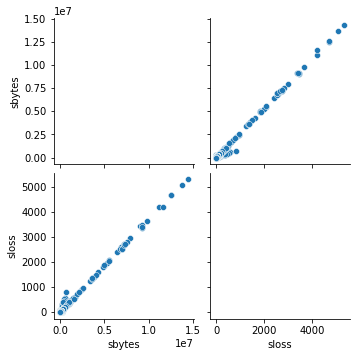

In [4]:
#sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['sbytes', 'sloss'])
plt.show()

In [5]:
test = pd.read_csv("../input/unsw-nb15/UNSW_NB15_testing-set.csv")

In [6]:
train.shape,test.shape

((82332, 45), (175341, 45))

## Dataset summary

In [7]:
if train.shape[0]<100000:
    print("Train and test sets are interchanged. Setting it correct.")
    train, test = test, train

Train and test sets are interchanged. Setting it correct.


In [8]:
train.sample(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
90752,90753,0.806381,tcp,http,FIN,10,8,758,354,21.081846,...,1,5,0,0,1,2,5,0,Fuzzers,1
121567,121568,0.000009,mfe-nsp,-,INT,2,0,200,0,111111.107200,...,1,4,0,0,0,3,4,0,Exploits,1
112235,112236,0.000010,unas,-,INT,2,0,200,0,100000.002500,...,6,8,0,0,0,7,8,0,DoS,1
170430,170431,0.000007,udp,dns,INT,2,0,114,0,142857.140900,...,12,15,0,0,0,12,15,0,Generic,1
89749,89750,0.000005,wb-expak,-,INT,2,0,200,0,200000.005100,...,5,17,0,0,0,6,12,0,DoS,1
29148,29149,0.130899,tcp,-,FIN,48,50,2958,32642,741.029359,...,1,1,0,0,0,2,5,0,Normal,0
117656,117657,56.052166,udp,dns,REQ,50,0,9200,0,0.874186,...,8,8,0,0,0,8,8,0,Fuzzers,1
171510,171511,0.000008,udp,dns,INT,2,0,114,0,125000.000300,...,17,26,0,0,0,17,26,0,Generic,1
119425,119426,2.990860,tcp,smtp,FIN,20,22,1926,1834,13.708432,...,1,1,0,0,0,3,1,0,Exploits,1
38191,38192,0.001066,udp,dns,CON,2,2,130,162,2814.258996,...,1,3,0,0,0,1,1,0,Normal,0


In [9]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

So, to summarize, we have 4 categorical features 'attack_cat','proto','service' and 'state'. There are no null values present.

### Target variable analysis

Text(0.5, 1.0, 'Distribution of attack')

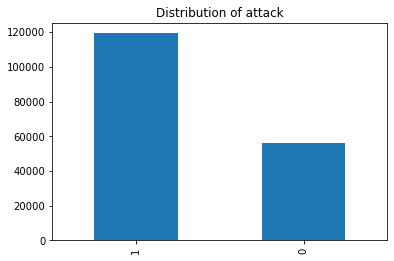

In [11]:
train['label'].value_counts().plot.bar()
plt.title("Distribution of attack")

In [12]:
train['label'].value_counts() / len(train) * 100 

1    68.062233
0    31.937767
Name: label, dtype: float64

In [13]:
train['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

## Data Preprocessing

In [14]:
# https://www.kaggle.com/khairulislam/unsw-nb15-feature-importance
drop_columns = ['attack_cat', 'id'] + ['response_body_len', 'spkts', 'ct_flw_http_mthd', 'trans_depth', 'dwin', 'ct_ftp_cmd', 'is_ftp_login']
for df in [train, test]:
    for col in drop_columns:
        if col in df.columns:
            print('Dropping '+col)
            df.drop([col], axis=1, inplace=True)

Dropping attack_cat
Dropping id
Dropping response_body_len
Dropping spkts
Dropping ct_flw_http_mthd
Dropping trans_depth
Dropping dwin
Dropping ct_ftp_cmd
Dropping is_ftp_login
Dropping attack_cat
Dropping id
Dropping response_body_len
Dropping spkts
Dropping ct_flw_http_mthd
Dropping trans_depth
Dropping dwin
Dropping ct_ftp_cmd
Dropping is_ftp_login


In [15]:
def feature_engineer(df):
    df.loc[~df['state'].isin(['FIN', 'INT', 'CON', 'REQ', 'RST']), 'state'] = 'others'
    df.loc[~df['service'].isin(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']), 'service'] = 'others'
    df.loc[df['proto'].isin(['igmp', 'icmp', 'rtp']), 'proto'] = 'igmp_icmp_rtp'
    df.loc[~df['proto'].isin(['tcp', 'udp', 'arp', 'ospf', 'igmp_icmp_rtp']), 'proto'] = 'others'
    return df

def get_cat_columns(train):
    categorical = []
    for col in train.columns:
        if train[col].dtype == 'object':
            categorical.append(col)
    return categorical

In [16]:
x_train, y_train = train.drop(['label'], axis=1), train['label']
x_test, y_test = test.drop(['label'], axis=1), test['label']

x_train, x_test = feature_engineer(x_train), feature_engineer(x_test)

categorical_columns = get_cat_columns(x_train)
non_categorical_columns = [x for x in x_train.columns if x not in categorical_columns]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[non_categorical_columns] = scaler.fit_transform(x_train[non_categorical_columns])
x_test[non_categorical_columns] = scaler.transform(x_test[non_categorical_columns])


x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
print("Column mismatch {0}, {1}".format(set(x_train.columns)- set(x_test.columns),  set(x_test.columns)- set(x_train.columns)))
features = list(set(x_train.columns) & set(x_test.columns))


Column mismatch set(), set()


In [17]:

print(f"Number of features {len(features)}")
x_train = x_train[features]
x_test = x_test[features]

Number of features 53


In [18]:
x_train.head()

,ackdat,dload,ct_dst_sport_ltm,dbytes,proto_igmp_icmp_rtp,proto_ospf,proto_udp,stcpb,smean,djit,...,dur,sttl,sinpkt,dinpkt,tcprtt,ct_src_dport_ltm,is_sm_ips_ports,dloss,service_ftp-data,service_pop3
0,-0.503014,-0.273700,-0.554373,-0.102726,0,0,0,-0.256392,-0.458048,-0.145905,...,-0.191029,0.703839,-0.132788,-0.080885,-0.521660,-0.544736,-0.126508,-0.131759,0,0
1,-0.503014,-0.069233,-0.554373,0.188544,0,0,0,0.331031,-0.414076,0.192913,...,-0.109485,-1.141901,-0.129251,-0.073735,-0.521660,-0.544736,-0.126508,0.190621,0,0
2,0.742202,-0.252044,-0.554373,-0.012133,0,0,0,0.846258,-0.443391,2.663504,...,0.040699,-1.141901,-0.104126,0.014711,0.888444,-0.544736,-0.126508,-0.017978,0,0
3,-0.503014,-0.275821,-0.554373,-0.098563,0,0,0,0.101729,-0.414076,1.080373,...,0.049729,-1.141901,-0.115034,0.002046,-0.521660,-0.544736,-0.126508,-0.074868,0,0
4,0.909954,-0.275561,-0.554373,-0.102057,0,0,0,1.082366,-0.409190,-0.120301,...,-0.140417,0.723268,-0.129549,-0.012721,1.096172,-0.420468,-0.126508,-0.112795,0,0


## Model 


### Light GBM

In [19]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

LGBMClassifier()

In [20]:
# predict the results
y_pred=clf.predict(x_test)

In [21]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8770


In [22]:
y_pred_train = clf.predict(x_train)

In [23]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9602


In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Training set score: 0.9602
Test set score: 0.8770


In [25]:


# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[27540  9460]
 [  666 44666]]

True Positives(TP) =  27540

True Negatives(TN) =  44666

False Positives(FP) =  9460

False Negatives(FN) =  666


<AxesSubplot:>

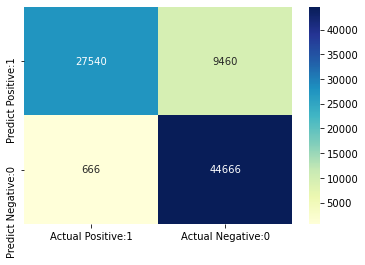

In [26]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     37000
           1       0.83      0.99      0.90     45332

    accuracy                           0.88     82332
   macro avg       0.90      0.86      0.87     82332
weighted avg       0.89      0.88      0.87     82332



## XG Boost

In [28]:
import xgboost as xgb

In [29]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:11:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
# make predictions on test data

y_pred = xgb_clf.predict(x_test)

In [31]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8733


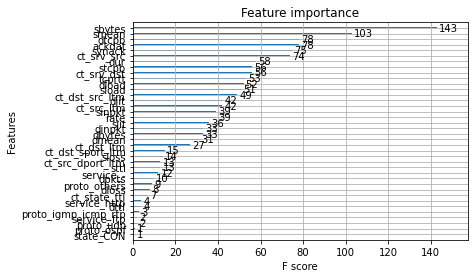

<Figure size 1440x1152 with 0 Axes>

In [32]:

xgb.plot_importance(xgb_clf)
plt.figure(figsize = (20, 16))
plt.show()

## Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(clf.score(x_test,y_test))

0.8134261283583539


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[22569 14431]
 [  930 44402]]

True Positives(TP) =  22569

True Negatives(TN) =  44402

False Positives(FP) =  14431

False Negatives(FN) =  930


## SVM

In [35]:
from sklearn import svm,preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8157217120925035


In [36]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[22067 14933]
 [  239 45093]]

True Positives(TP) =  22067

True Negatives(TN) =  45093

False Positives(FP) =  14933

False Negatives(FN) =  239


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.74     37000
           1       0.75      0.99      0.86     45332

    accuracy                           0.82     82332
   macro avg       0.87      0.80      0.80     82332
weighted avg       0.86      0.82      0.81     82332



# LightGBM with hyperparameter optimization

In [38]:
#basic tools 
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
import shap
warnings.simplefilter(action='ignore', category=FutureWarning)

In [39]:
y=y_train
X=x_train

In [40]:
%%time

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]#basic tools 
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
import shap
warnings.simplefilter(action='ignore', category=FutureWarning)
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X, y, init_round=5, opt_round=10, n_folds=3, random_seed=6,n_estimators=10000)

IndentationError: unexpected indent (<unknown>, line 61)

In [41]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

NameError: name 'opt_params' is not defined

In [42]:
%%time 

target=y_train
features= [c for c in x_train.columns if c not in ['label']]


folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=31416)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(x_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(x_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(x_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 15000
    clf = lgb.train(opt_params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 250)
    oof[val_idx] = clf.predict(x_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(x_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0


NameError: name 'opt_params' is not defined

In [43]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:20].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(20,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('Feature_Importance.png')

KeyError: "None of [Index(['Feature', 'importance'], dtype='object')] are in the [columns]"

In [44]:
y_pred = clf.predict(x_test)

In [45]:
y_pred[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [46]:
y_pred_target = [0 for i in range(len(y_pred))]
for i in range(len(y_pred)):
    if(y_pred[i] >= 0.5):
        y_pred_target[i] = 1
    else:
        y_pred_target[i] = 0

In [47]:
y_pred_target[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]

In [48]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_target, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_target)))

LightGBM Model accuracy score: 0.8157


In [49]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Training set score: 0.9372
Test set score: 0.8157


In [50]:


# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_target)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[22067 14933]
 [  239 45093]]

True Positives(TP) =  22067

True Negatives(TN) =  45093

False Positives(FP) =  14933

False Negatives(FN) =  239


<AxesSubplot:>

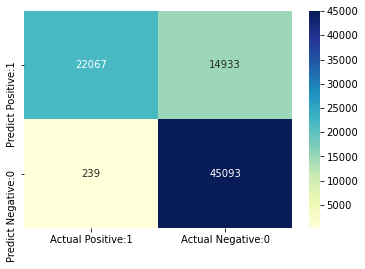

In [51]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_target))

              precision    recall  f1-score   support

           0       0.99      0.60      0.74     37000
           1       0.75      0.99      0.86     45332

    accuracy                           0.82     82332
   macro avg       0.87      0.80      0.80     82332
weighted avg       0.86      0.82      0.81     82332

